# Climate Analysis with ClimRR

## Getting Started

::: {.callout-caution title="Useful links + References" collapse="true" width="100%"}

- Useful links + References:
    - [Geopandas: An Introduction](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-2/geopandas-an-introduction.html)
    - [An Introduction to Earth and Environmental Data Science](https://earth-env-data-science.github.io/intro.html)
        - [Final Projects](https://earth-env-data-science.github.io/projects.html) (good examples)
        - [Hands-On: Aggregating the Data](https://climateestimate.net/content/example-step3.html)
    - [Using Weather Data and Climate Model Output in Economic Analyses of Climate Change](https://www.journals.uchicago.edu/doi/10.1093/reep/ret016)
    - [On the use and misuse of climate change projections in international development](https://wires.onlinelibrary.wiley.com/doi/full/10.1002/wcc.579)

:::

::: {.callout-note title="Learning Goals" collapse="false" style="width:100%;"}

The goal of this project is to teach students to[^goals]:

- Use Unix commands to work with files and navigate directories
- Use JupyterHub + basic familiarity with how to use Jupyter notebooks on HPC systems
- Identify some of the common file types and data formats for geospatial data
    - (+ common python libraries for geospatial data analysis)
- Perform exploratory data analysis on geospatial data
    - (+ understand different operations for manipulating and interacting with this data)
    - tabular vs. gridded data
- Perform simple visualizations in Python to display different types of data (e.g. maps, line charts, interactive visualizations, etc)
    - using figures to illustrate a point or idea
    - know what types of plots to use for which situations / data types
- Understand control flow / basic structure of a Python script
    - using Python in Jupyter[^surprise]
    - `import`-ing libraries, etc

:::

[^surprise]: Getting Python setup correctly can be **surprisingly** difficult

[^goals]: Building on ideas from [Earth and Environmental Science](https://earth-env-data-science.github.io/intro.html)

### Reading and Writing Files

We use [`GeoPandas`](https://geopandas.org/en/stable/index.html), an open
source project to make working with geospatial data in python easier.

GeoPandas extends the datatypes used by [pandas](http://pandas.pydata.org/) to
allow spatial operations on geometric types.

Geometric operations are performed by [`shapely`](https://shapely.readthedocs.io/).

GeoPandas further depends on [`fiona`](https://fiona.readthedocs.io/) and
[`matplotlib`](http://matplotlib.org/) for plotting.

GeoPandas can read almost any vector-based spatial data format including ESRI
shapefile, GeoJSON files and more using the command


In [1]:
import geopandas as gpd
import geodatasets
gdf = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))
gdf.head(n=2)

/Users/samforeman/miniconda3/envs/ClimRR/lib/python3.11/site-packages/pyproj/__init__.py:91: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_DATA (PROJ 9.1+) | PROJ_LIB (PROJ<9.1) or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


community  NID  POP2010  POP2000  POPCH   POPPERCH  popplus  popneg  \
0   DOUGLAS   35    18238    26470  -8232 -31.099358        0       1   
1   OAKLAND   36     5918     6110   -192  -3.142390        0       1   

                                            geometry  
0  MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...  
1  MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...

which returns a GeoDataFrame object.

A `GeoDataFrame` is a tabular data structure that contains a `GeoSeries`.

The most important property of a `GeoDataFrame` is that it always has one
`GeoSeries` column that holds a special status.

This `GeoSeries` is referred to as the `GeoDataFrame`'s "geometry". When a
spatial method is applied to a `GeoDataFrame` (or a spatial attribute like area
is called), this commands will always act on the "geometry" column[^geometry].

[^geometry]: The “geometry” column – no matter its name – can be accessed
through the geometry attribute (`gdf.geometry`), and the name of the geometry
column can be found by typing `gdf.geometry.name`.

### Imports / setup

We've prepared some useful functions in
[`src/ClimRR/data.py`](https://github.com/saforem2/climate-analysis/blob/main/src/ClimRR/data.py)
to simplify the process of loading and working with our data.

<!-- ::: {.callout-warning title="Warning" collapse="false"} -->
<!---->
<!-- Make sure to follow the instructions from [Setup and -->
<!-- Installation](/qmd/GettingStarted/setup.qmd) for installing the `ClimRR` -->
<!-- package. -->
<!---->
<!-- ::: -->


In [2]:
#| code-fold: true
#| code-summary: Imports
import matplotlib_inline
import matplotlib.pyplot as plt
import geopandas as gpd
import warnings

import matplotlib.pyplot as plt

from enrich.style import STYLES
from rich.theme import Theme
from rich.console import Console as Console
from ClimRR import get_logger, set_plot_style
from ClimRR.data import DATA_DIR

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

set_plot_style()
theme = Theme(STYLES)
log = get_logger()
console = Console(
    theme=Theme(STYLES),
    log_path=False,
    markup=True,
    width=512
)

# Data Organization

The [ClimRR Data](https://anl.box.com/s/hmkkgkrkzxxocfe9kpgrzk2gfc4gizp8) can
be downloaded as a `*.zip` file, and contains:  

- **Shapefile** (as an additional `*.zip` _inside_ the original)
- Individual `*.csv`'s for each of the climate variables
    - `{AnnualTemperatureMaximum,...,HeatingDegreeDays}.csv`

::: {.callout-tip title="`*.zip` contents:" collapse="true"}

```bash
📂 ClimRR Data Download/
┣━━ 📂 GridCells2Shapefile/
┃   ┣━━ 📄 GridCells2.cpg
┃   ┣━━ 📄 GridCells2.dbf
┃   ┣━━ 📄 GridCells2.prj
┃   ┣━━ 📄 GridCells2.sbn
┃   ┣━━ 📄 GridCells2.sbx
┃   ┣━━ 📄 GridCells2.shp
┃   ┣━━ 📄 GridCells2.shp.xml
┃   ┗━━ 📄 GridCells2.shx
┣━━ 📂 GridCellsShapefile/
┃   ┣━━ 📄 GridCells.cpg
┃   ┣━━ 📄 GridCells.dbf
┃   ┣━━ 📄 GridCells.prj
┃   ┣━━ 📄 GridCells.sbn
┃   ┣━━ 📄 GridCells.sbx
┃   ┣━━ 📄 GridCells.shp
┃   ┣━━ 📄 GridCells.shp.xml
┃   ┗━━ 📄 GridCells.shx
┣━━ 📄 AnnualTemperatureMaximum.csv
┣━━ 📄 AnnualTemperatureMinimum.csv
┣━━ 📄 ClimRR Metadata and Data Dictionary.pdf
┣━━ 📄 ConsecutiveDayswithNoPrecipitation.csv
┣━━ 📄 FireWeatherIndex_Wildfire.csv
┣━━ 📄 GridCells2Shapefile.zip
┣━━ 📄 GridCellsShapefile.zip
┣━━ 📄 HeatingDegreeDays.csv
┣━━ 📄 Precipitation_inches_AnnualTotal.csv
┣━━ 📄 README.txt
┣━━ 📄 SeasonalTemperatureMaximum.csv
┣━━ 📄 SeasonalTemperatureMinimum.csv
┗━━ 📄 WindSpeed.csv
```



:::

## Types of Data

::: {#fig-data-types}

![](../../assets/vector-data.png)

(Image credit: National Ecological Observatory Network (NEON))
:::

One of the most common file formats for vector data is the [ESRI
shapefile](https://en.wikipedia.org/wiki/Shapefile), which is what we will be
working with for this project.

### Metadata

Metadata is "data about the data"[^metadata] and is (by design) meant to give
additional information or provide context about a dataset.

Examples might include:

- When was this data created?
    - By who? For what? Where at? When? **Why**??
- How is this data licensed?
- Is there a reference for this data? (DOI ? URL ? etc.)
- What variables or fields are contained in this data?
    - What do they represent? Are there units?
- If the data is geospatial, what geographical or temporal area is included?
- Additional (often contextual) information about the data
    - e.g. "this data was created to inform a population about upcoming weather events" or similar


Metadata is often expected to be of a certain form, or to follow specific conventions / guidelines.

This is important to keep in mind and will allow others to understand your data
without needing an explanation (e.g. "what does this abbreviation mean?", "how
is this variable defined?", etc.)

Some common metadata conventions for GIS data include:

- [Climate and Forecast (CF) Conventions](https://cfconventions.org/)
- [Attribute Convention for Data Discovery](https://wiki.esipfed.org/Attribute_Convention_for_Data_Discovery_1-3)

[Schema.org](https://schema.org) is another useful reference and provides a
general framework for dealing with metadata.

## FAIR Data

[FAIR](https://www.force11.org/group/fairgroup/fairprinciples) stands for
"Findable, Accessible, Interoperable, Reusable", and provides a set
of guidelines for data sharing.

In the age of "big data", its important that we use (and promote!) tools that
facilitate the effective sharing of data.

Ideally, our data would be completely self-contained and provide, via
metadata, all of the information required to understand and work with it.

<!-- This is important to keep in mind as it allows others to understand and -->
<!-- interpret your data in a well-defined manner. -->
<!---->
<!-- There are oftentimes well-established conventions and formats that metadata is -->
<!-- expected to adhere to, so it is important to make -->



[^metadata]: [Metadata](https://earth-env-data-science.github.io/lectures/data.html#metadata)


## Load Shapefile and inspect

A `shapefile` is provided in the [ClimRR Data Download
(ANL)](https://anl.box.com/s/hmkkgkrkzxxocfe9kpgrzk2gfc4gizp8) and can be loaded using `geopandas.read_file(...)` which will return a `geopandas.GeoDataFrame`:


In [3]:
shpfile = DATA_DIR.joinpath(
    "GridCellsShapefile/GridCells.shp"
)
shape = gpd.read_file(shpfile)

Each entry in this table defines a single **grid cell** (12km x 12 km) which
collectively tile the United States.

We can get a better understanding of whats going on by looking at the first few
entries:


In [4]:
shape.head(n=2)

OBJECTID Crossmodel    Shape_Leng    Shape_Area  \
0         1   R161C438  63614.764866  2.529273e+08   
1         2   R125C222  61384.219597  2.355013e+08   

                                            geometry  
0  POLYGON ((-9530601.177 4726046.614, -9534793.8...  
1  POLYGON ((-12959076.287 4395610.472, -12974301...

We see that each row has the following columns: `{OBJECTID, Crossmodel,
Shape_Leng, Shape_Area, geometry}`.

In particular, the `Crossmodel`[^crossmodel] column is a text ID that uniquely
identifies an individual cell.

[^crossmodel]: Truncated name for "Crossmodel_CellName".

To be explicit, let's look at the `WindSpeed.csv` file.


## Dealing with Geometry

Our shapefile contains a grid of _cells_ (12km x 12km) which tile the
continental US.

We can inspect a single cell:


In [5]:
cell = shape[shape["Crossmodel"] == 'R146C497']
cell.head()

OBJECTID Crossmodel    Shape_Leng    Shape_Area  \
4         5   R146C497  60142.919468  2.260731e+08   

                                            geometry  
4  POLYGON ((-8733007.764 4224658.634, -8738250.3...

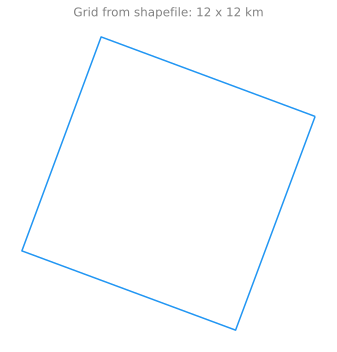

In [6]:
ax = cell.boundary.plot()
ax.set_axis_off()
_ = ax.set_title('Grid from shapefile: 12 x 12 km')
plt.tight_layout()

In [7]:
cell.explore()

## Load data from `*.csv` files

Each entry (row) in the `.csv` has a `Crossmodel` column (e.g. `R146C497`)
which corresponds to a row in our `shapefile` that uniquely determines its
location on the Earth.

We can associate with each of the `.csv`s the `geometry` used in our
`shapefile` to position our data on the globe.


In [8]:
import pandas as pd
csvs = [i for i in DATA_DIR.rglob('*.csv')]
data = {}
for f in csvs:
    key = f.stem
    tmp = pd.read_csv(f.as_posix())
    gdf = shape.merge(tmp, on='Crossmodel')
    gdf['boundary'] = gdf.boundary
    gdf['centroid'] = gdf.centroid
    data[key] = gdf
    console.log(f"data['{key}'].shape={data[key].shape}")

[20:42:54] data['FireWeatherIndex_Wildfire'].shape=(62834, 35)

           data['HeatingDegreeDays'].shape=(62834, 10)

[20:42:55] data['AnnualTemperatureMinimum'].shape=(62834, 18)

           data['SeasonalTemperatureMaximum'].shape=(62834, 27)

           data['ConsecutiveDayswithNoPrecipitation'].shape=(55896, 19)

           data['SeasonalTemperatureMinimum'].shape=(62834, 27)

           data['WindSpeed'].shape=(62834, 18)

           data['AnnualTemperatureMaximum'].shape=(62834, 18)

           data['Precipitation_inches_AnnualTotal'].shape=(55896, 18)

## Look at the WindSpeed data

Lets inspect one of the entries in our `data[(...)]` dictionary, `WindSpeed`, for example:


In [9]:
data["WindSpeed"].head()

OBJECTID Crossmodel    Shape_Leng    Shape_Area  \
0         1   R161C438  63614.764866  2.529273e+08   
1         2   R125C222  61384.219597  2.355013e+08   
2         3   R121C235  61111.892875  2.334164e+08   
3         4   R169C431  64716.234995  2.617618e+08   
4         5   R146C497  60142.919468  2.260731e+08   

                                            geometry     hist  rcp45_midc  \
0  POLYGON ((-9530601.177 4726046.614, -9534793.8...  7.21540     7.19415   
1  POLYGON ((-12959076.287 4395610.472, -12974301...  8.32612     8.11360   
2  POLYGON ((-12754805.395 4355815.951, -12770000...  8.58573     8.59828   
3  POLYGON ((-9605729.481 4879238.815, -9609863.1...  9.17284     9.21681   
4  POLYGON ((-8733007.764 4224658.634, -8738250.3...  8.25430     8.19130   

   rcp45_endc  rcp85_midc  rcp85_endc  mid45_hist  end45_hist  mid85_hist  \
0     7.38917     7.30470     7.22690   -0.021256    0.173764    0.089297   
1     8.26028     8.17420     8.02081   -0.212523   -0.065843   -0.151919   
2     8.56058     8.54483     8.55421    0.012547   -0.025149   -0.040898   
3     9.44966     9.26548     9.14917    0.043968    0.276813    0.092635   
4     8.34417     8.29698     8.29411   -0.062996    0.089874    0.042684   

   end85_hist  mid85_45  end85_45  \
0    0.011499  0.110553 -0.162264   
1   -0.305307  0.060603 -0.239465   
2   -0.031519 -0.053446 -0.006370   
3   -0.023674  0.048667 -0.300487   
4    0.039807  0.105680 -0.050067   

                                            boundary  \
0  LINESTRING (-9530601.177 4726046.614, -9534793...   
1  LINESTRING (-12959076.287 4395610.472, -129743...   
2  LINESTRING (-12754805.395 4355815.951, -127700...   
3  LINESTRING (-9605729.481 4879238.815, -9609863...   
4  LINESTRING (-8733007.764 4224658.634, -8738250...   

                            centroid  
0   POINT (-9540369.710 4720470.575)  
1  POINT (-12967596.341 4402326.143)  
2  POINT (-12763132.114 4362694.465)  
3   POINT (-9615619.029 4873482.586)  
4   POINT (-8742676.917 4220233.536)

We see that each entry has a `geometry` column, as well as columns for
`{hist,rcp45_midc, rcp45_endc, rcp85_midc, rcp85_endc, ...}` which contains the
numerical value of the `WindSpeed` in each cell under different scenarios at
different points in time.

<!-- We can see this explicitly by plotting this value for a single cell: -->

Let's look at the `WindSpeed` for our individual cell:


In [10]:
cell_wind = data["WindSpeed"][data["WindSpeed"]["Crossmodel"] == 'R146C497']

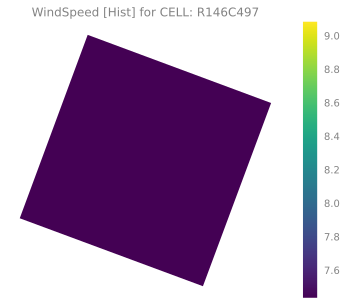

In [11]:
ax = cell_wind.plot(column='hist', legend=True)
ax.set_axis_off()
_ = ax.set_title("WindSpeed [Hist] for CELL: R146C497")

## Visualizing our Data

Lets inspect the first few entries from our Shapefile:

::: {#fig-increasing-cells style="text-align:left!important;"}


In [12]:
#| code-fold: true
fig, ax = plt.subplots(
    figsize=(12, 3.5),
    nrows=1,
    ncols=3,
    sharey='row'
)
ax = ax.flatten()
pairs = {
    '1k': list(range(1000)),
    '5k': list(range(5000)),
    '20k': list(range(20000)),
}
for idx, (key, val) in enumerate(pairs.items()):
    ax[idx] = shape.loc[val, :].plot(ax=ax[idx])
    ax[idx].set_axis_off()
    _ = ax[idx].set_title(f"First {key} cells")
plt.tight_layout()

As we include more cells, we see the outline of the US beginning to take shape.
:::


[^venv]:
    Preferably, inside a virtual environment, e.g.
    ```bash
    $ mkdir -p ~/.venvs/ClimRR
    $ python3 -m venv ~/.venvs/ClimRR --system-site-packages
    $ source ~/.venvs/ClimRR/bin/activate
    $ python3 -m pip install git+https://github.com/saforem2/climate-analysis
    ```